<a href="https://colab.research.google.com/github/SanjayBista1010/my-first-repo/blob/main/kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [4]:
X = np.array([
    [2, 10],
    [2, 5],
    [8, 4],
    [5, 8],
    [7, 5],
    [6, 4],
    [1, 2],
    [4, 9]
])

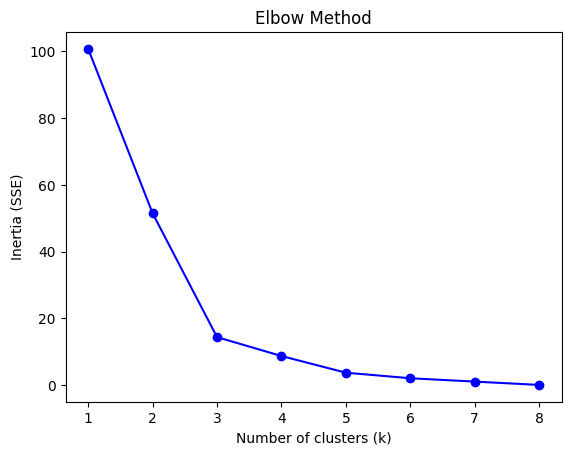

In [5]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

inertia = []  # Sum of squared distances to nearest cluster center
K = range(1, 9)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (SSE)")
plt.title("Elbow Method")
plt.show()

In [6]:
sil_scores = {}
for k in range(2, 8):  # silhouette not defined for k=1
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    sil = silhouette_score(X, labels)
    sil_scores[k] = sil

print("Silhouette Scores for k=2..7:", sil_scores)

Silhouette Scores for k=2..7: {2: np.float64(0.38834298285323554), 3: np.float64(0.5708086620582917), 4: np.float64(0.47159245233453273), 5: np.float64(0.36664911357015373), 6: np.float64(0.15852567706292603), 7: np.float64(0.03661165235168155)}


In [8]:
best_k = max(sil_scores, key = sil_scores.get)
print("Best value of k:", best_k)

Best value of k: 3


# **Final KMeans with best k**

In [9]:
final_kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
final_labels = final_kmeans.fit_predict(X)

print("\nCluster assignments:", final_labels)
print("Final centroids:\n", final_kmeans.cluster_centers_)


Cluster assignments: [1 2 0 1 0 0 2 1]
Final centroids:
 [[7.         4.33333333]
 [3.66666667 9.        ]
 [1.5        3.5       ]]


# **Plot Clusters**

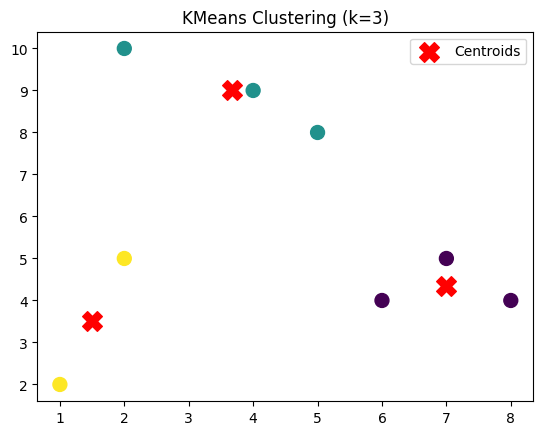

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=final_labels, s=100, cmap='viridis')
plt.scatter(final_kmeans.cluster_centers_[:, 0], final_kmeans.cluster_centers_[:, 1],
            c='red', marker='X', s=200, label='Centroids')
plt.title(f"KMeans Clustering (k={best_k})")
plt.legend()
plt.show()